In [8]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [9]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_1


In [10]:
samples = gen_quant.sample(data={'M':6}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Variable  lambda  shape:  (1000,)
Variable  theta  shape:  (1000, 6)


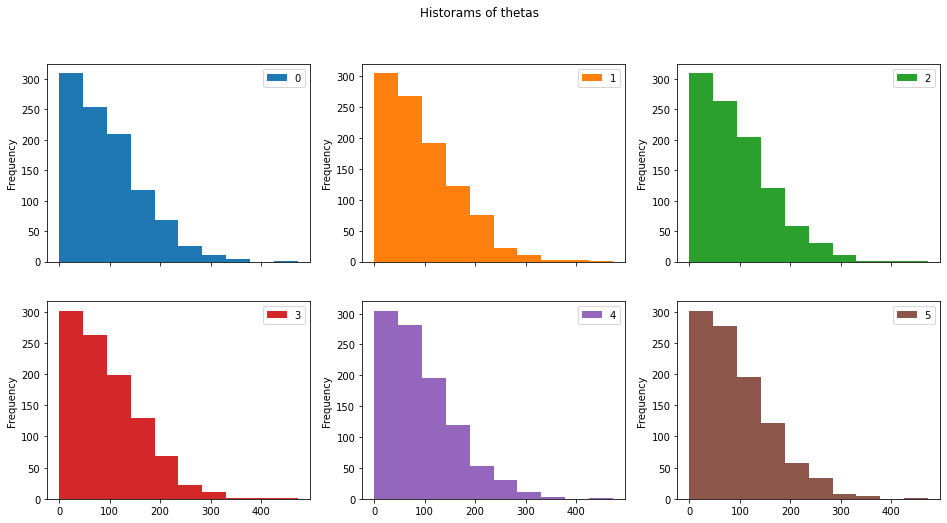

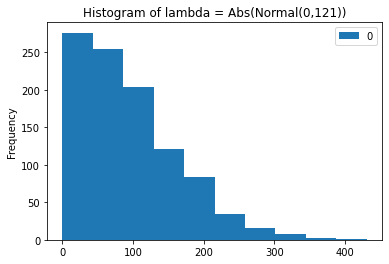

In [11]:
vars = samples.stan_variables()
for (k,v) in vars.items():
    print('Variable ',k,' shape: ', v.shape)

thetas = samples.stan_variable(name='theta')
lambdas = samples.stan_variable(name='lambda')
title = "Historams of thetas"
pd.DataFrame(data=thetas).plot(subplots=True, kind='hist', figsize=(16,8), layout=(2,3), title=title);
pd.DataFrame(data=lambdas).plot(kind='hist', title='Histogram of lambda = Abs(Normal(0,121))');

## Excercise 2 - Constraints on the data 

In [14]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_2
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4


In [16]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,1]})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_3
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3


## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [17]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


INFO:cmdstanpy:compiling stan program, exe file: /mnt/c/ola/DataAnalytics/lab02/code_4
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_4
INFO:cmdstanpy:created output directory: /mnt/c/ola/DataAnalytics/lab02/samples
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:Processing csv files: /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-1.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-2.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-3.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
9099 of 24000 (38%) t

"Processing csv files: /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-1.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-2.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-3.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_4-202106122149-4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n9099 of 24000 (38%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete."

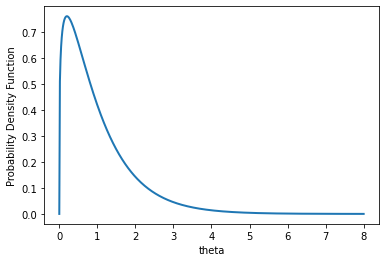

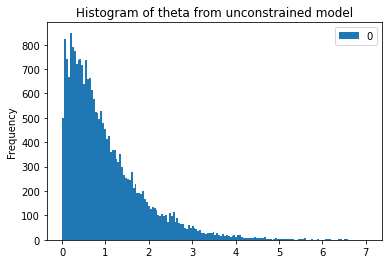

In [18]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

theta_model4 = out_gamma1.stan_variable(name='theta')
pd.DataFrame(data=theta_model4).plot(kind='hist', bins=160, title="Histogram of theta from unconstrained model");


### Constrained parameter

In [19]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan program, exe file: /mnt/c/ola/DataAnalytics/lab02/code_5
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_5
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:Processing csv files: /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-1.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-2.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-3.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
1 of 24000 (0.0042%) transitions ended with a divergence.
These divergent transitions indicate that H

"Processing csv files: /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-1.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-2.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-3.csv, /mnt/c/ola/DataAnalytics/lab02/samples/code_5-202106122149-4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.0042%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete."

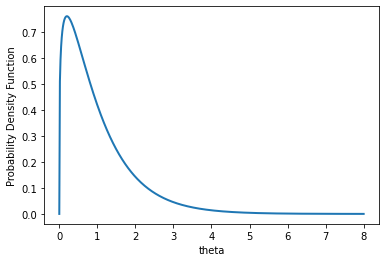

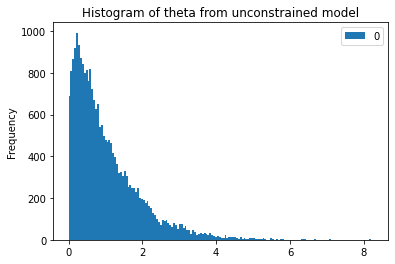

In [20]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

theta_model5 = out_gamma2.stan_variable(name='theta')
pd.DataFrame(data=theta_model5).plot(kind='hist', bins=160, title="Histogram of theta from unconstrained model");

## Excercise 4 -  Selection of parameters using equation solving



In [29]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 10 # number of letters in the first name
L =  7# number of letters in the last name
y0 = 1 # initial guess for the equation solving

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)

Std = tunes.stan_variable(name='sigma')
print("Standard deviation = ", Std)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_6
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


Standard deviation =  [3.29991]


## Excercise 5 - different methods of defining models


In [30]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_7
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_8
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_9


In [31]:
data = {'N': 6}
seed = 5121998#integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2


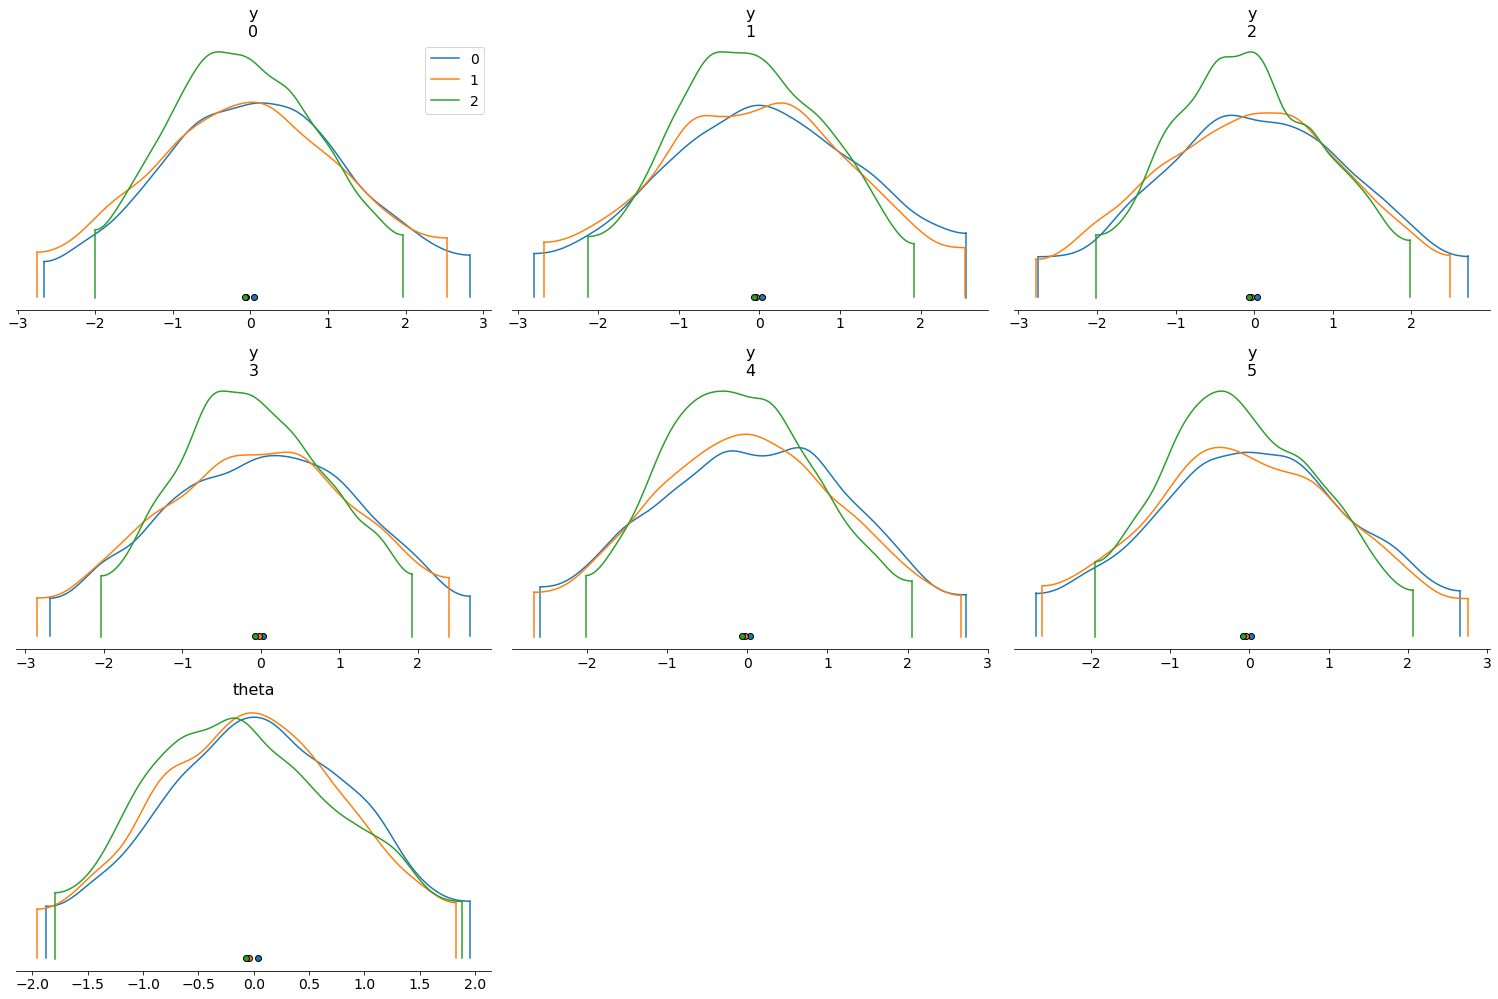

In [32]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [33]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y7 = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_1)
mean_of_y8 = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_2)
mean_of_y9 = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variable

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /mnt/c/ola/DataAnalytics/lab02/code_10
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [34]:
mean_of_y7.generated_quantities_pd

,mean_y
0,0.090134
1,-0.319967
2,0.109578
3,-0.293492
4,-1.197820
...,...
3995,-1.368300
3996,1.645710
3997,1.238700
3998,1.808370


In [35]:
samples = model_gq.sample(data={'N':6}, seed=seed)

vars = samples.stan_variables()
for (k,v) in vars.items():
    print('Variable ',k,' shape: ', v.shape)
m_y = samples.stan_variable(name='mean_y')

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


Variable  y  shape:  (4000, 6)
Variable  theta  shape:  (4000,)
Variable  mean_y  shape:  (4000,)


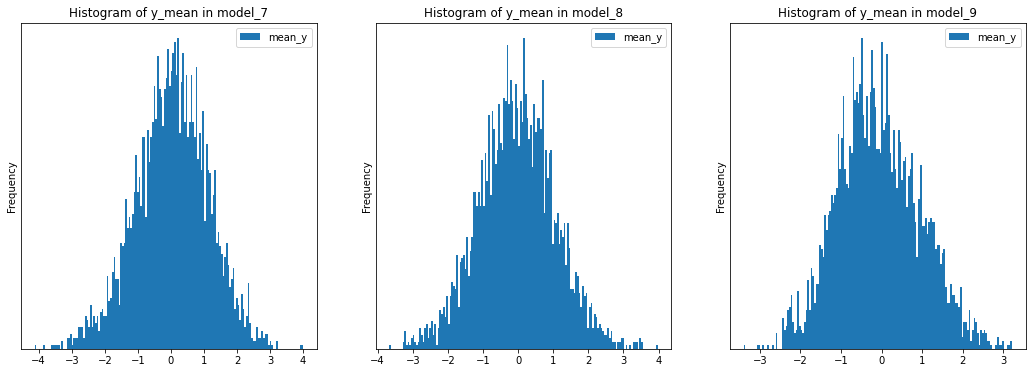

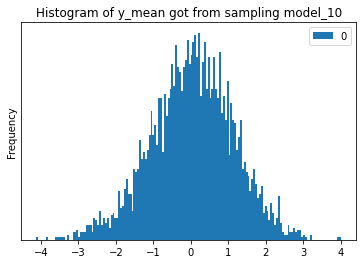

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = [18,6])
ax[0].set_yticks([]);ax[1].set_yticks([]);ax[2].set_yticks([])
pd.DataFrame(data=mean_of_y7.generated_quantities_pd).plot(kind='hist', bins=160, title="Histogram of y_mean in model_7", ax = ax[0]);
pd.DataFrame(data=mean_of_y8.generated_quantities_pd).plot(kind='hist', bins=160, title="Histogram of y_mean in model_8", ax = ax[1]);
pd.DataFrame(data=mean_of_y9.generated_quantities_pd).plot(kind='hist', bins=160, title="Histogram of y_mean in model_9", ax = ax[2]);
pd.DataFrame(data=m_y).plot(kind='hist', bins=160, title="Histogram of y_mean got from sampling model_10", yticks=[]);